In [3]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression 

In [4]:
#load data 

df = pd.read_csv('data/modifiedDigits4Classes.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0


In [5]:
df.shape

(720, 65)

In [6]:
#Visualize Each Digit
pixel_colNames = df.columns[:-1]

In [7]:
pixel_colNames

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63'],
      dtype='object')

In [8]:
#Get All columns excepts the label columns for first image
image_val = df.loc[0, pixel_colNames].values

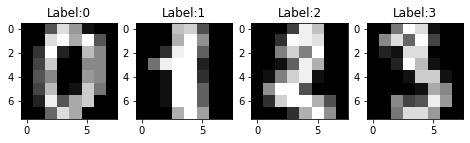

In [10]:
plt.figure(figsize=(10,2))
for index in range(0,4):
    plt.subplot(1,5,1+index)
    image_val = df.loc[index, pixel_colNames].values
    image_label = df.loc[index, 'label']
    plt.imshow(image_val.reshape(8,8), cmap = 'gray')
    plt.title('Label:'+str(image_label))

In [12]:
#Split the data in to training & Test Set
x_train, x_test, y_train, y_test = train_test_split(df[pixel_colNames], df['label'], random_state=0)

In [14]:
#Standardize data
scaler = StandardScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
#logistic Regression

clf = LogisticRegression(solver = 'liblinear', 
                        multi_class = 'ovr', 
                        random_state = 0)

In [17]:
clf.fit(x_train , y_train)

LogisticRegression(multi_class='ovr', random_state=0, solver='liblinear')

In [18]:
print('Training Accuracy: ',clf.score(x_train, y_train))
print('Test_Accuracy: ',clf.score(x_test, y_test))

Training Accuracy:  1.0
Test_Accuracy:  1.0


In [21]:
print(clf.intercept_)
print(clf.coef_.shape)

[-2.712674   -3.54379096 -3.18367757 -2.623974  ]
(4, 64)


In [22]:
#prediction
clf.predict_proba(x_test[0:1])

array([[0.00183123, 0.98368966, 0.00536378, 0.00911533]])

In [23]:
clf.predict(x_train[0:1])

array([1], dtype=int64)